# **Data cleaning and transforming **

In [2]:
# import all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv(r'C:\Users\MM\OneDrive\Desktop\DEPI_Graduation_Project\DataSet_Before_Preparation\sales_data_sample.csv',  encoding='latin-1')
df['ORDER NUMBER'] = df['ORDER NUMBER'].astype('str')

df['ORDER DATE'] = pd.to_datetime(df['ORDER DATE']) # Convert 'ORDER DATE' to datetime (Standardizing Data Format)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              2823 non-null   int64         
 1   ORDER NUMBER            2823 non-null   object        
 2   QUANTITY ORDERED        2823 non-null   int64         
 3   PRICE EACH              2823 non-null   float64       
 4   ORDER LINE NUMBER       2823 non-null   int64         
 5   SALES                   2823 non-null   float64       
 6   ORDER DATE              2823 non-null   datetime64[ns]
 7   STATUS                  2823 non-null   object        
 8   QTR_ID                  2823 non-null   int64         
 9   MONTH_ID                2823 non-null   int64         
 10  YEAR_ID                 2823 non-null   int64         
 11  PRODUCTLINE             2823 non-null   object        
 12  MSRP                    2823 non-null   int64   

In [3]:
df.isnull().sum()
# this step to be certain how many coulmn we have that has high number of nulls

Unnamed: 0                   0
ORDER NUMBER                 0
QUANTITY ORDERED             0
PRICE EACH                   0
ORDER LINE NUMBER            0
SALES                        0
ORDER DATE                   0
STATUS                       0
QTR_ID                       0
MONTH_ID                     0
YEAR_ID                      0
PRODUCTLINE                  0
MSRP                         0
PRODUCTCODE                  0
CUSTOMER NAME                0
PHONE                        0
ADDRESSLINE1                 0
ADDRESSLINE2              2521
CITY                         0
STATE                     1486
POSTALCODE                  76
COUNTRY                      0
TERRITORY                    0
CONTACTLASTNAME              0
CONTACTFIRSTNAME             0
DEALSIZE                     0
Year                         0
Month_Name                   0
MM-Year                      0
Quarter_for_every_year       0
dtype: int64

In [6]:
# to Filter Rows with Missing 'TERRITORY'
# Identify Unique Countries with Missing 'TERRITORY'
Null_territory = df[df['TERRITORY'].isna()]
countries_with_Null_territory = Null_territory['COUNTRY'].unique()
print(countries_with_Null_territory)

[]


In [10]:
#The USA and Canada  belong to the same Territory "AMER" we can fill the missing values up with ''AMER'
df["TERRITORY"] = df["TERRITORY"].fillna("AMER")

In [12]:
df['TERRITORY'].unique()
#after filling up the missing territory values 'AMER' was add to the territory list
# USA and japan are countries not territories so it will have to be replaced

array(['AMER', 'EMEA', 'APAC'], dtype=object)

In [14]:
df['TERRITORY']= df['TERRITORY'].replace('USA','AMER')
df['TERRITORY']= df['TERRITORY'].replace('Japan','APAC')
df['TERRITORY'].unique()
#japan belongs to APAC territory and USA belongs to AMER so they were replaced with APAC and AMER

array(['AMER', 'EMEA', 'APAC'], dtype=object)

In [13]:
df.head()

,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,AMER,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,AMER,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,AMER,Brown,Julie,Medium


In [16]:
Null_states = df[df['STATE'].isna()]

countries_with_Null_state = Null_states['COUNTRY'].unique()
print(countries_with_Null_state)
# we have many countries with high number of missing states and it will be hard to identify each missing state and it won't affect our analysis so no need
#for the state column

['France' 'Norway' 'Finland' 'Australia' 'UK' 'Spain' 'Sweden' 'Singapore'
 'Italy' 'Denmark' 'Belgium' 'Philippines' 'Germany' 'Switzerland'
 'Ireland']


In [18]:
# Remove the unnecessary coulmns
df= df.drop(['PHONE','STATE', 'POSTALCODE'
,'CONTACTLASTNAME','CONTACTFIRSTNAME','ADDRESSLINE1','ADDRESSLINE2'], axis=1)

df.head()


,Unnamed: 0,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,...,PRODUCTCODE,CUSTOMER NAME,CITY,COUNTRY,TERRITORY,DEALSIZE,Year,Month_Name,MM-Year,Quarter_for_every_year
0,0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,S10_1678,Land of Toys Inc.,NYC,USA,AMER,Small,2003,Feb,2003-02,q1-2003
1,1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,S10_1678,Reims Collectables,Reims,France,EMEA,Small,2003,May,2003-05,q2-2003
2,2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,S10_1678,Lyon Souveniers,Paris,France,EMEA,Medium,2003,Jul,2003-07,q3-2003
3,3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,S10_1678,Toys4GrownUps.com,Pasadena,USA,AMER,Medium,2003,Aug,2003-08,q3-2003
4,4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,AMER,Medium,2003,Oct,2003-10,q4-2003


In [20]:
#Convert DataFrame to CSV
#df.to_csv(r'C:\Users\MM\OneDrive\Desktop\DEPI_Graduation_Project\DataSet_Before_Preparation\sales_data_sample.csv')
df.to_csv(r'Data_after_cleaning.csv')

**Analysis and exploration**

In [38]:
df.columns

Index(['ORDER NUMBER', 'QUANTITY ORDERED', 'PRICE EACH', 'ORDER LINE NUMBER',
       'SALES', 'ORDER DATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMER NAME', 'CITY',
       'COUNTRY', 'TERRITORY', 'DEALSIZE'],
      dtype='object')

In [40]:
df['STATUS'].unique()
#we have 6 shipping status

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [42]:
len(df['STATUS'].unique())

6

In [44]:
df['YEAR_ID'].value_counts()
#so we have data of three years ....the data of 2005 is less than the previous years

YEAR_ID
2004    1345
2003    1000
2005     478
Name: count, dtype: int64

***sales by product Line***

In [49]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [51]:
len(df['PRODUCTLINE'].unique())#we have 7 lines

7

In [206]:
#high-performing products
the_most_sailing_productLine=pd.DataFrame(df.groupby('PRODUCTLINE')['SALES'].agg('sum').sort_values().tail(5))
the_most_sailing_productLine.reset_index(inplace=True)

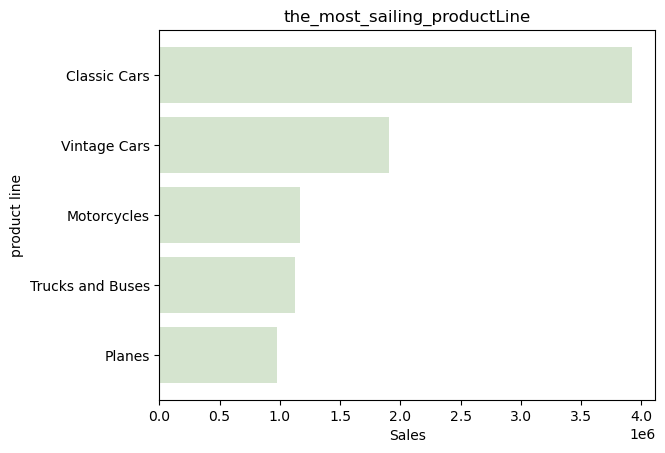

In [208]:
plt.barh(y=the_most_sailing_productLine['PRODUCTLINE'],width=the_most_sailing_productLine['SALES'],color='#D5E4CF')
plt.xlabel('Sales')
plt.ylabel('product line')
plt.title('the_most_sailing_productLine')
plt.show()

In [55]:
df['ORDER LINE NUMBER'].unique()# we have 18 order line no and 7 product line

array([ 2,  5,  6, 14,  1,  9,  7, 13, 12,  4, 11,  8,  3, 10, 17, 16, 15,
       18], dtype=int64)

In [59]:
df_after_sorting=df.sort_values(by='ORDER LINE NUMBER', ascending=True)
df_after_sorting

,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
773,10334,34,61.38,1,2086.92,2004-11-19,On Hold,4,11,2004,...,Berguvsvgen 8,NaN,Lule,NaN,S-958 22,Sweden,EMEA,Berglund,Christina,Small
266,10104,34,100.00,1,5958.50,2003-01-31,Shipped,1,1,2003,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
265,10417,21,100.00,1,3447.78,2005-05-13,Disputed,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2169,10371,26,100.00,1,4044.04,2005-01-23,Shipped,1,1,2005,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,AMER,Nelson,Valarie,Medium
551,10419,37,100.00,1,5202.94,2005-05-17,Shipped,2,5,2005,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,10398,28,72.26,18,2023.28,2005-03-30,Shipped,1,3,2005,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2606,10316,48,74.45,18,3573.60,2004-11-01,Shipped,4,11,2004,...,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium
935,10106,41,83.44,18,3421.04,2003-02-17,Shipped,1,2,2003,...,Via Ludovico il Moro 22,NaN,Bergamo,NaN,24100,Italy,EMEA,Rovelli,Giovanni,Medium
2807,10222,36,63.34,18,2280.24,2004-02-19,Shipped,1,2,2004,...,361 Furth Circle,NaN,San Diego,CA,91217,USA,AMER,Thompson,Valarie,Small


In [61]:
order_line_no=pd.DataFrame(df_after_sorting.groupby('ORDER LINE NUMBER')['PRODUCTLINE'].value_counts())
order_line_no.reset_index(inplace=True)
order_line_no['ORDER LINE NUMBER'].value_counts()#every order line no has 7 product lines except lone no =18


ORDER LINE NUMBER
1     7
2     7
17    7
16    7
15    7
14    7
13    7
12    7
11    7
10    7
9     7
8     7
7     7
6     7
5     7
4     7
3     7
18    5
Name: count, dtype: int64

In [63]:
order_line_no.loc[order_line_no['ORDER LINE NUMBER']==18]

,ORDER LINE NUMBER,PRODUCTLINE,count
119,18,Ships,4
120,18,Planes,3
121,18,Motorcycles,1
122,18,Trucks and Buses,1
123,18,Vintage Cars,1


In [65]:
df_after_sorting.groupby('PRODUCTLINE')['ORDER LINE NUMBER'].unique()
#every product line has no of different sub lines

PRODUCTLINE
Classic Cars        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Motorcycles         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Planes              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Ships               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Trains              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Trucks and Buses    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Vintage Cars        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: ORDER LINE NUMBER, dtype: object

In [67]:
df['CITY'].unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'San Francisco', 'Burlingame',
       'Lille', 'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'Los Angeles', 'San Diego', 'Bruxelles',
       'Tsawassen', 'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz',
       'Makati City', 'Marseille', 'Koln', 'Gensve', 'Reggio Emilia',
       'Frankfurt', 'Espoo', 'Dublin', 'Manchester', 'Aaarhus',
       'Glendale', 'Sevilla', 'Brisbane', 'Strasbourg', 'Las Vegas',
       'Oslo', 'Bergamo', 'Glen Waverly', 'Munich', 'Charleroi'],
      dtype=object)

***Sales By Country***

In [69]:
len(df['CITY'].unique())

73

In [71]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [87]:
#replace Austria with Australia
#df.loc[df['COUNTRY']=='Austria','COUNTRY']='Australia'

In [89]:
#df[df['COUNTRY']=='Austria']

,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [91]:
len(df['COUNTRY'].unique())

18

In [93]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [95]:
most_sailing_by_country=pd.DataFrame(df.groupby('COUNTRY')['SALES'].agg('sum').sort_values().tail(4))
most_sailing_by_country.reset_index(inplace=True)
most_sailing_by_country

,COUNTRY,SALES
0,Australia,832685.63
1,France,1110916.52
2,Spain,1215686.92
3,USA,3627982.83


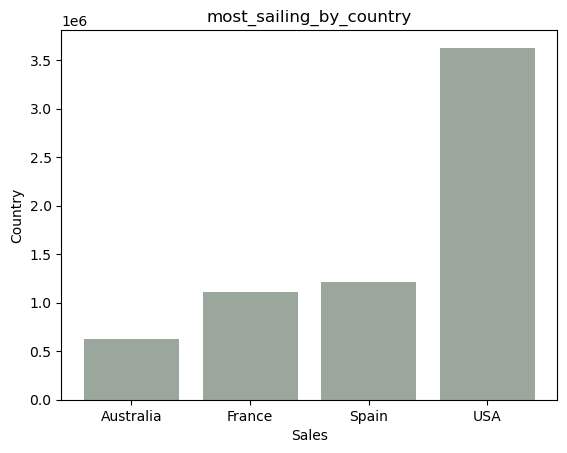

In [135]:
plt.bar(most_sailing_by_country['COUNTRY'],most_sailing_by_country['SALES'],color='#9BA79C')
plt.xlabel('Sales')
plt.ylabel('Country')
plt.title('most_sailing_by_country')
plt.show()

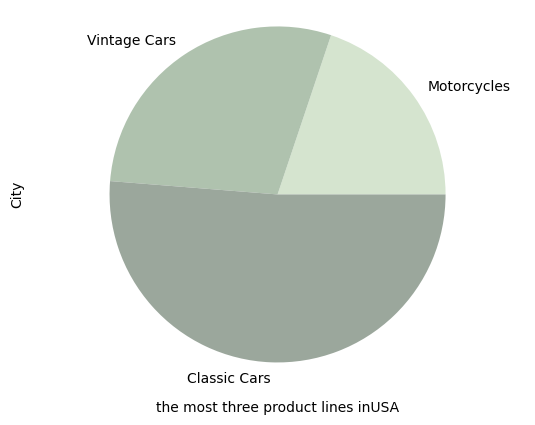

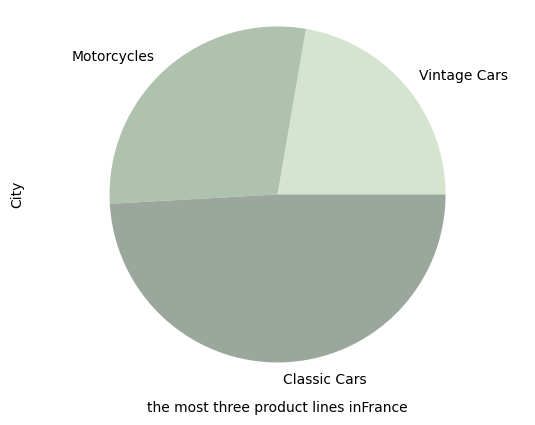

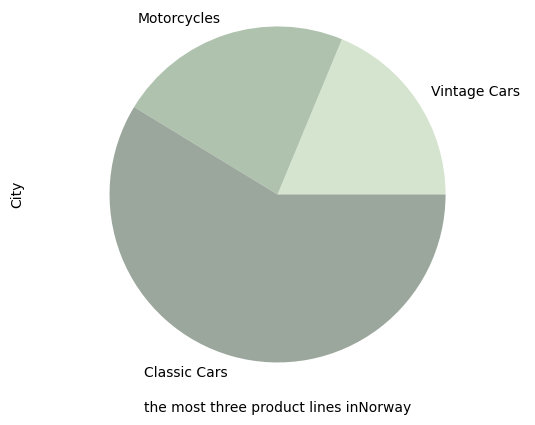

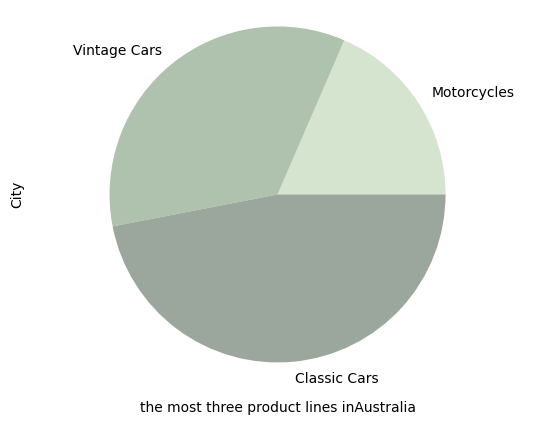

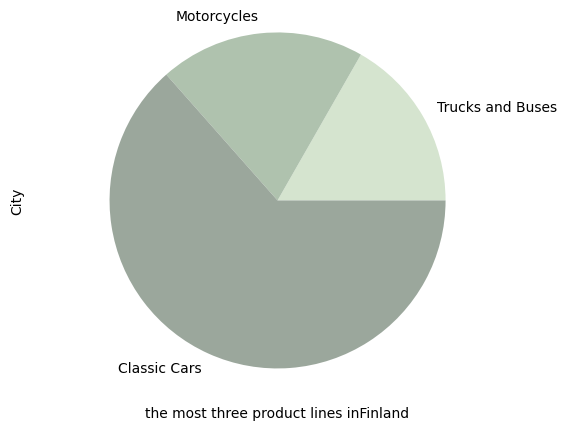

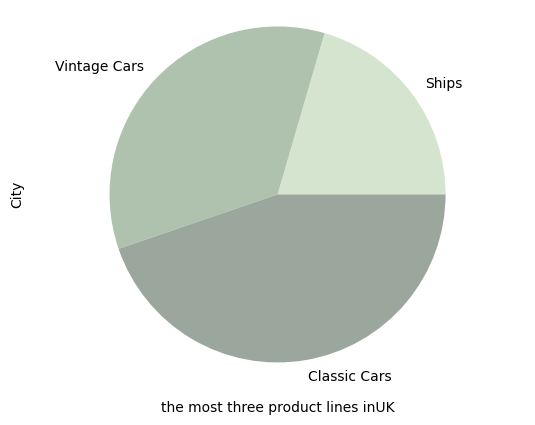

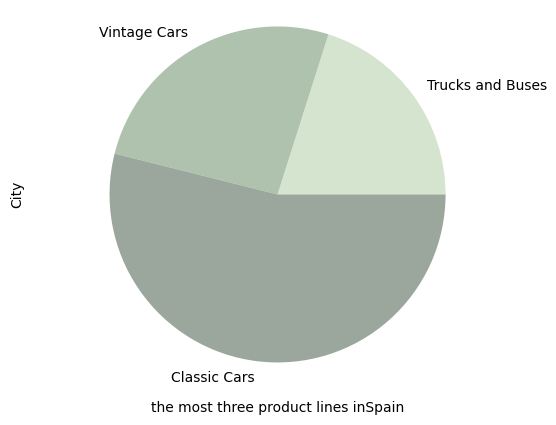

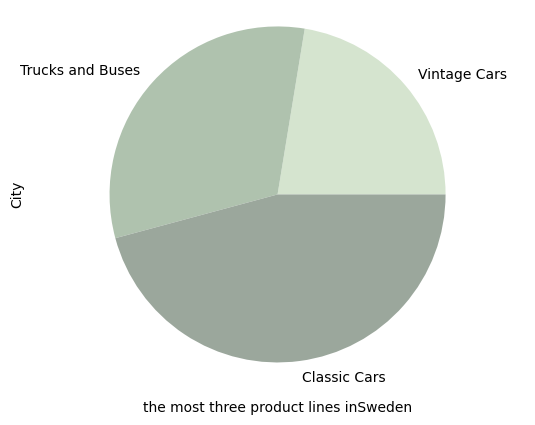

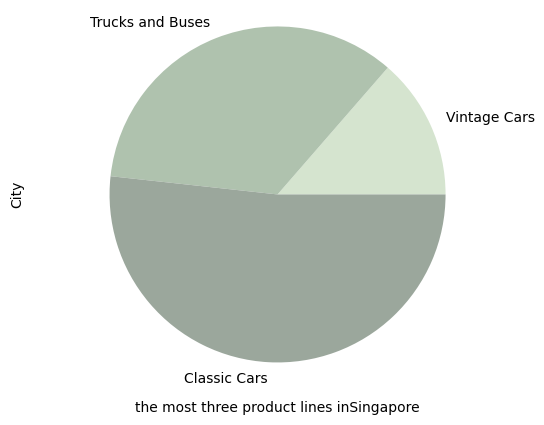

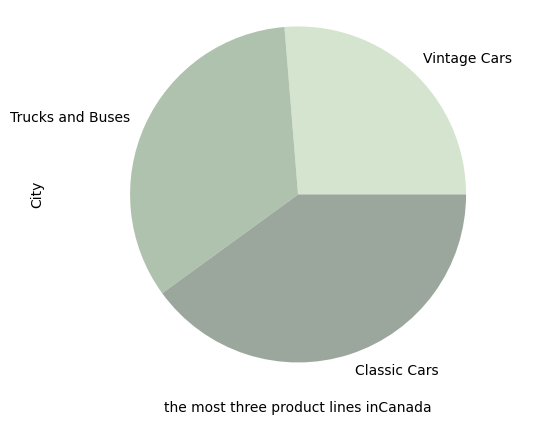

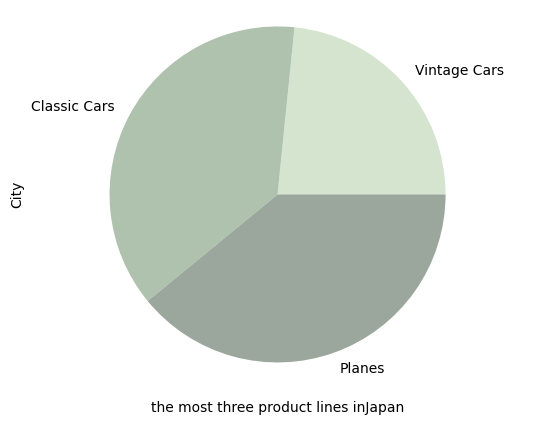

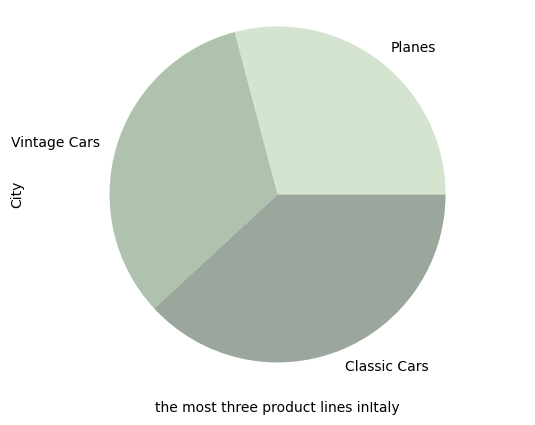

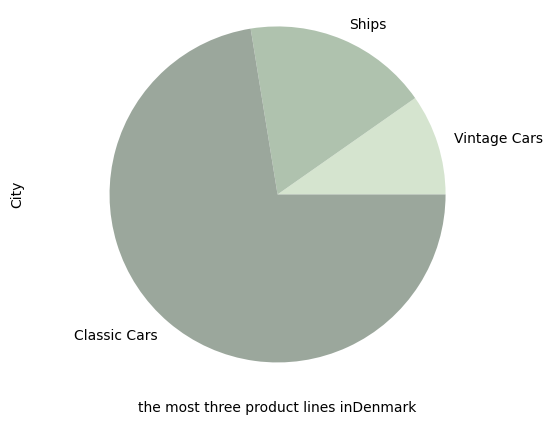

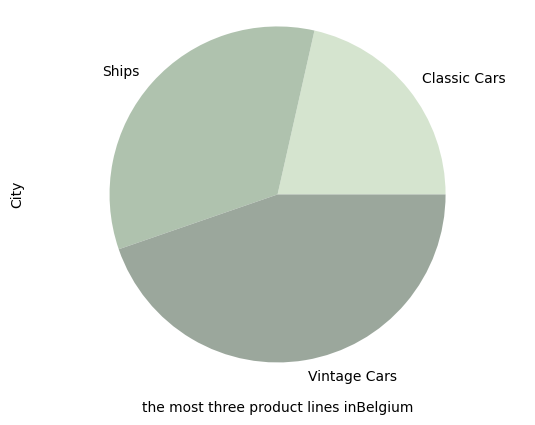

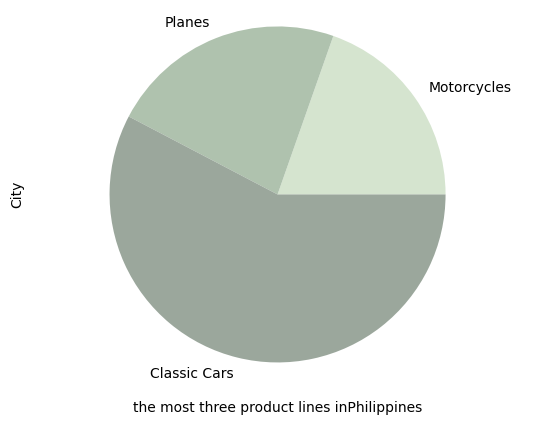

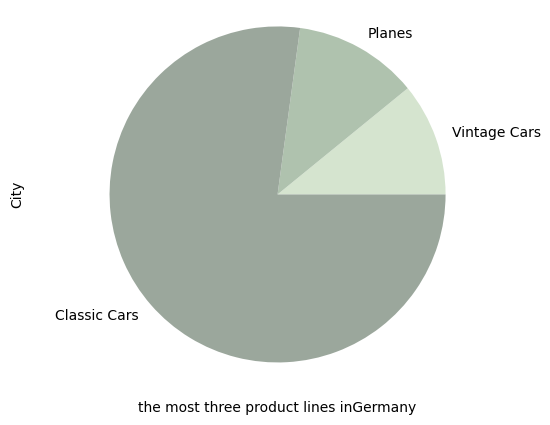

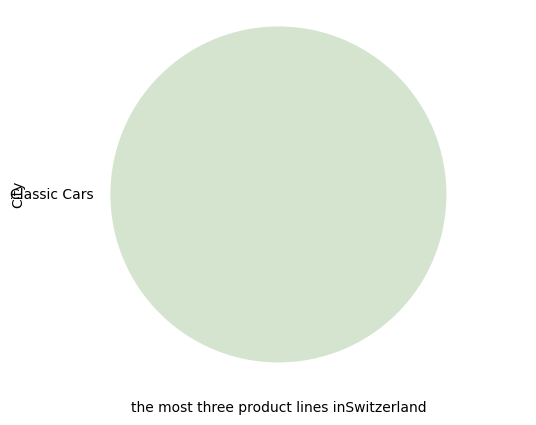

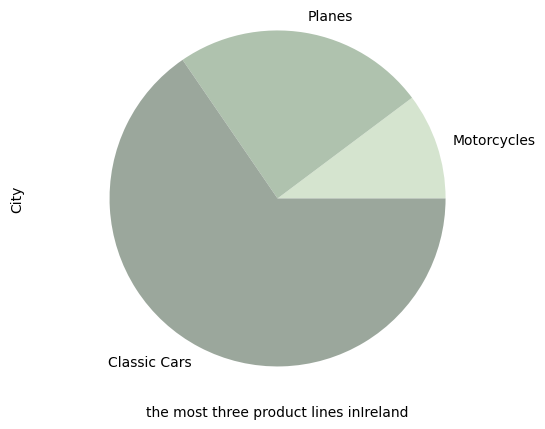

In [202]:
#most popular product line for every country
countries=df['COUNTRY'].unique()
for country in countries:
    countries_dataFrame=df[df['COUNTRY']==country]
    countries_dataFrame=pd.DataFrame(countries_dataFrame.groupby('PRODUCTLINE')['SALES'].agg('sum').sort_values().tail(3))
    countries_dataFrame.reset_index(inplace=True)  
    plt.pie(countries_dataFrame['SALES'], labels=countries_dataFrame['PRODUCTLINE'],colors=['#D5E4CF','#AFC2AE','#9BA79C'])
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
    plt.xlabel('\nthe most three product lines in'+country)
    plt.ylabel('City')
    plt.show()

In [137]:
df.head()

,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMER NAME,CITY,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,NaN,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,EMEA,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,EMEA,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,NaN,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,NaN,Medium


**Time Series Analysis**

In [281]:
#evaluating sales performance by year
df['Year']=df['ORDER DATE'].dt.strftime('%Y')
df.head()

,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year,Month_Name,MM-Year
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NY,10022,USA,AMER,Yu,Kwai,Small,2003,Feb,2003-02
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,51100,France,EMEA,Henriot,Paul,Small,2003,May,2003-05
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2003,Jul,2003-07
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,CA,90003,USA,AMER,Young,Julie,Medium,2003,Aug,2003-08
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,CA,NaN,USA,AMER,Brown,Julie,Medium,2003,Oct,2003-10


In [240]:
#sales trend for every year
year_trend=pd.DataFrame(df.groupby('Year')['SALES'].sum().sort_values())
year_trend.reset_index(inplace=True)
year_trend
#type(year_trend['Year'])

,Year,SALES
0,2005,1791486.71
1,2003,3516979.54
2,2004,4724162.60


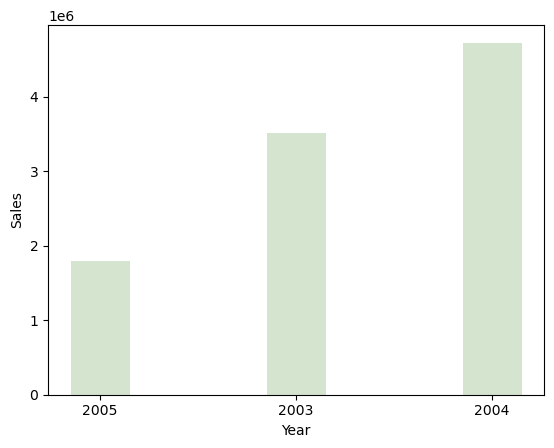

In [244]:
plt.bar(year_trend['Year'],year_trend['SALES'], color='#D5E4CF',width = 0.3 ) 
plt.xlabel('Year') 
plt.ylabel('Sales') 
plt.show() 

In [268]:
df['Month_Name']= df['ORDER DATE'].dt.month_name().str[:3]
df['Month_Name']

0       Feb
1       May
2       Jul
3       Aug
4       Oct
       ... 
2818    Dec
2819    Jan
2820    Mar
2821    Mar
2822    May
Name: Month_Name, Length: 2823, dtype: object

In [270]:
#Monthly sales trends
monthly_trend=pd.DataFrame(df.groupby('Month_Name')['SALES'].sum())
monthly_trend.reset_index(inplace=True)
monthly_trend

,Month_Name,SALES
0,Apr,669390.96
1,Aug,659310.57
2,Dec,634679.12
3,Feb,810441.90
4,Jan,785874.44
5,Jul,514875.97
6,Jun,454756.78
7,Mar,754501.39
8,May,923972.56
9,Nov,2118885.67


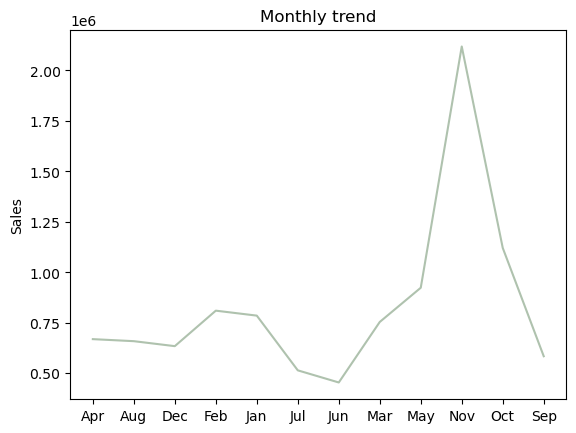

In [307]:
plt.plot(monthly_trend['Month_Name'],monthly_trend['SALES'],color="#AFC2AE")
plt.ylabel('Sales')
plt.title("Monthly trend")
plt.show()
#after nov there is decreasing in sales

In [279]:
#Extract Month and Year
df['MM-Year']=df['ORDER DATE'].dt.strftime('%Y-%m')
df['MM-Year']

0       2003-02
1       2003-05
2       2003-07
3       2003-08
4       2003-10
         ...   
2818    2004-12
2819    2005-01
2820    2005-03
2821    2005-03
2822    2005-05
Name: MM-Year, Length: 2823, dtype: object

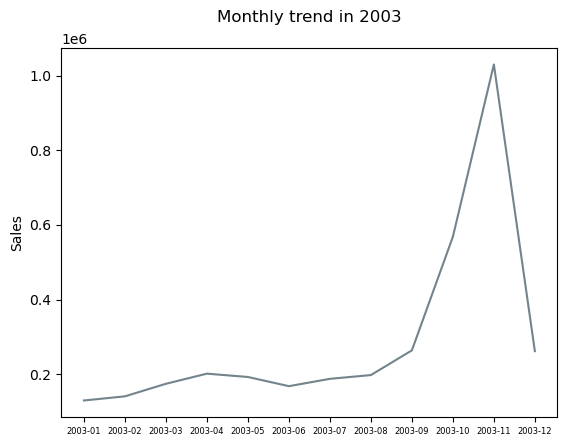

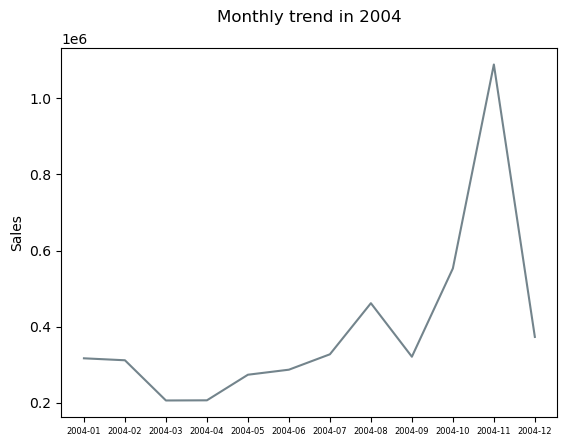

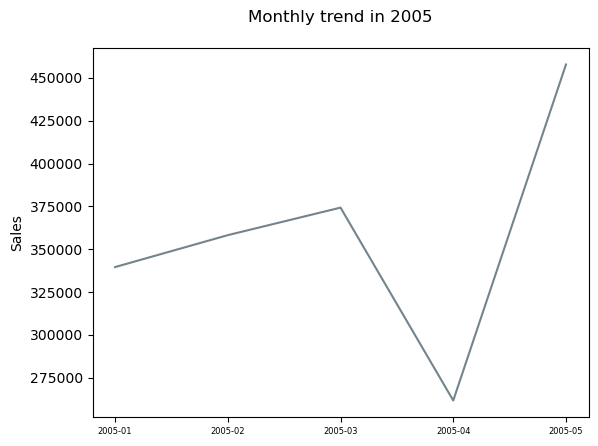

In [331]:
Years=df['Year'].unique()
for Year in Years:
    trend_Monthly_Year=df[df['Year']==Year]
    trend_Monthly_Year=pd.DataFrame(trend_Monthly_Year.groupby('MM-Year')['SALES'].agg('sum'))
    trend_Monthly_Year.reset_index(inplace=True)
    plt.plot(trend_Monthly_Year['MM-Year'],trend_Monthly_Year['SALES'],color="#73848c")
    plt.ylabel('Sales')
    plt.title(f"Monthly trend in {Year}\n")
    plt.xticks(fontsize = 6) 
    plt.show()
    #print(trend_Monthly_Year)
    #The last Year is having decreasing

In [323]:
df.head()

,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year,Month_Name,MM-Year
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NY,10022,USA,AMER,Yu,Kwai,Small,2003,Feb,2003-02
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,51100,France,EMEA,Henriot,Paul,Small,2003,May,2003-05
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2003,Jul,2003-07
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,CA,90003,USA,AMER,Young,Julie,Medium,2003,Aug,2003-08
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,CA,NaN,USA,AMER,Brown,Julie,Medium,2003,Oct,2003-10


***Sales Quarter By Quarter***

In [369]:
#yearly_quarter=df[['Year','QTR_ID','SALES']]
#yearly_quarter.groupby('Year')[['QTR_ID','SALES']].sum('SALES')
#yearly_quarter=yearly_quarter.pivot(index=yearly_quarter.groupby('Year'), columns='QTR_ID', values='SALES')

In [385]:
Years=df['Year'].unique()
year_2003=df[df['YEAR_ID']==2003]
year_2004=df[df['YEAR_ID']==2004]
year_2005=df[df['YEAR_ID']==2005]
year_2003=pd.DataFrame(year_2003.groupby('QTR_ID')['SALES'].agg('sum').sort_values())
year_2003.reset_index(inplace=True)
year_2004=pd.DataFrame(year_2004.groupby('QTR_ID')['SALES'].agg('sum').sort_values())
year_2004.reset_index(inplace=True)
year_2005=pd.DataFrame(year_2003.groupby('QTR_ID')['SALES'].agg('sum').sort_values())
year_2005.reset_index(inplace=True)


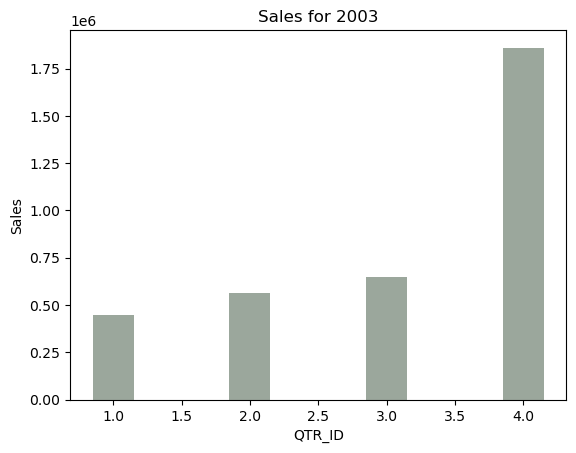

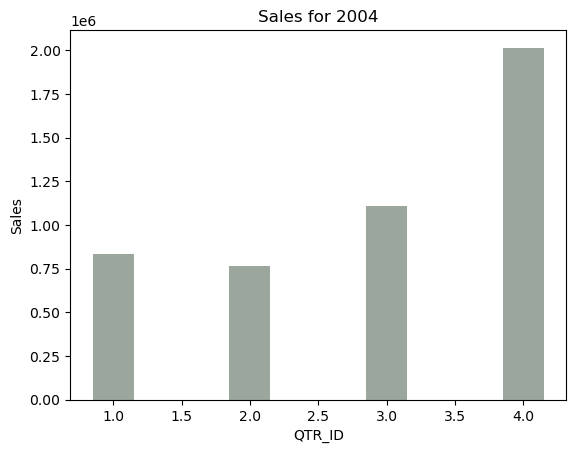

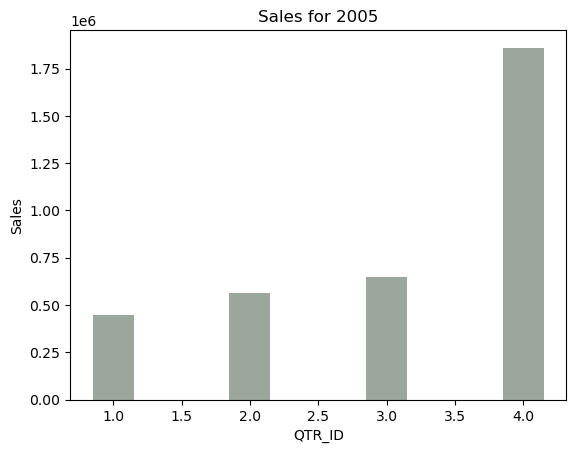

In [387]:
plt.bar(year_2003['QTR_ID'],year_2003['SALES'], color='#9BA79C',width = 0.3 ) 
plt.xlabel('QTR_ID') 
plt.ylabel('Sales') 
plt.title('Sales for 2003')
plt.show() 
plt.bar(year_2004['QTR_ID'],year_2004['SALES'], color='#9BA79C',width = 0.3 ) 
plt.xlabel('QTR_ID') 
plt.ylabel('Sales') 
plt.title('Sales for 2004')
plt.show() 

plt.bar(year_2005['QTR_ID'],year_2005['SALES'], color='#9BA79C',width = 0.3 ) 
plt.xlabel('QTR_ID') 
plt.ylabel('Sales') 
plt.title('Sales for 2005')
plt.show() 


In [443]:
df['Quarter_for_every_year']= df['ORDER DATE'].dt.to_period('Q').dt.strftime('q%q-%Y ')
#df['Quarter_for_every_year']= df['ORDER DATE'].dt.quarter
df['Quarter_for_every_year']
df.head()


,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year,Month_Name,MM-Year,Quarter_for_every_year
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,10022,USA,AMER,Yu,Kwai,Small,2003,Feb,2003-02,q1-2003
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,51100,France,EMEA,Henriot,Paul,Small,2003,May,2003-05,q2-2003
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,75508,France,EMEA,Da Cunha,Daniel,Medium,2003,Jul,2003-07,q3-2003
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,90003,USA,AMER,Young,Julie,Medium,2003,Aug,2003-08,q3-2003
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,USA,AMER,Brown,Julie,Medium,2003,Oct,2003-10,q4-2003


In [445]:
Quarter_Trend=pd.DataFrame(df.groupby('Quarter_for_every_year')['SALES'].agg('sum'))
Quarter_Trend.reset_index(inplace=True)
Quarter_Trend

,Quarter_for_every_year,SALES
0,q1-2003,445094.69
1,q1-2004,833730.68
2,q1-2005,1071992.36
3,q2-2003,562365.22
4,q2-2004,766260.73
5,q2-2005,719494.35
6,q3-2003,649514.54
7,q3-2004,1109396.27
8,q4-2003,1860005.09
9,q4-2004,2014774.92


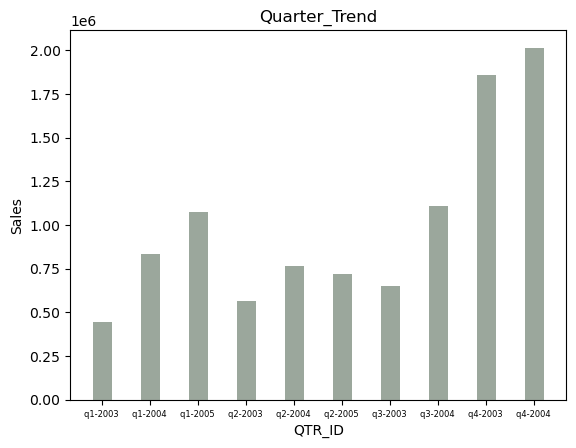

In [449]:
#Quarter Trend
plt.bar(Quarter_Trend['Quarter_for_every_year'],Quarter_Trend['SALES'], color='#9BA79C',width = 0.4 ) 
plt.xlabel('QTR_ID') 
plt.ylabel('Sales') 
plt.xticks(fontsize = 6) 
plt.title('Quarter_Trend')
plt.show() 

In [134]:
df['Month_Name']= df['ORDER DATE'].dt.month_name().str[:3]
df['Month_Name']

0       Feb
1       May
2       Jul
3       Aug
4       Oct
       ... 
2818    Dec
2819    Jan
2820    Mar
2821    Mar
2822    May
Name: Month_Name, Length: 2823, dtype: object

In [136]:
df['Month_Name']= df['ORDER DATE'].dt.to_period('M').dt.strftime('%m %Y')
df['Month_Name']

0       02 2003
1       05 2003
2       07 2003
3       08 2003
4       10 2003
         ...   
2818    12 2004
2819    01 2005
2820    03 2005
2821    03 2005
2822    05 2005
Name: Month_Name, Length: 2823, dtype: object

In [294]:
#Extract Day of week from DateTime 
df['day_of_week']=df['ORDER DATE'].dt.day_name()
df['day_of_week']

0          Monday
1       Wednesday
2         Tuesday
3          Monday
4          Friday
          ...    
2818     Thursday
2819       Monday
2820      Tuesday
2821       Monday
2822       Friday
Name: day_of_week, Length: 2823, dtype: object

In [ ]:
***----------------------------***

In [266]:
df.groupby('PRODUCTLINE')['PRODUCTCODE'].value_counts()
#checking for every product line we have multiple product code

PRODUCTLINE   PRODUCTCODE
Classic Cars  S18_3232       52
              S10_1949       28
              S10_4962       28
              S24_1444       28
              S24_2840       28
                             ..
Vintage Cars  S32_4289       24
              S18_1749       22
              S18_2248       22
              S18_4409       22
              S24_3969       22
Name: count, Length: 109, dtype: int64

In [177]:
df2=df.groupby('PRODUCTCODE')['ORDER LINE NUMBER'].value_counts()
df2

PRODUCTCODE  ORDER LINE NUMBER
S10_1678     1                    6
             2                    6
             9                    3
             5                    2
             6                    2
                                 ..
S72_3212     2                    1
             3                    1
             7                    1
             10                   1
             18                   1
Name: count, Length: 1261, dtype: int64

In [183]:
df2.groupby('PRODUCTCODE').get_group('S10_1678').count()

10

***top 2 product lines for every year & Which Year the product line achieve its sailing***

In [200]:
df.groupby(['YEAR_ID','PRODUCTLINE'])['SALES'].agg('sum')

YEAR_ID  PRODUCTLINE     
2003     Classic Cars        1484785.29
         Motorcycles          370895.58
         Planes               272257.60
         Ships                244821.09
         Trains                72802.29
         Trucks and Buses     420429.93
         Vintage Cars         650987.76
2004     Classic Cars        1762257.09
         Motorcycles          560545.23
         Planes               502671.80
         Ships                341437.97
         Trains               116523.85
         Trucks and Buses     529302.89
         Vintage Cars         911423.77
2005     Classic Cars         672573.28
         Motorcycles          234947.53
         Planes               200074.17
         Ships                128178.07
         Trains                36917.33
         Trucks and Buses     178057.02
         Vintage Cars         340739.31
Name: SALES, dtype: float64

In [222]:
#Top 2 product lines for every year
print("Top two product Lines for every Year\n ")
for year in df['YEAR_ID'].unique():
    data_for_every_year=df.loc[df['YEAR_ID']==year]
    top_Product_Line=data_for_every_year.groupby('PRODUCTLINE')['SALES'].agg('sum').sort_values().tail(2)
    print(f'''Year : {year} \n {top_Product_Line}''')

Top two product Lines for every Year
 
Year : 2003 
 PRODUCTLINE
Vintage Cars     650987.76
Classic Cars    1484785.29
Name: SALES, dtype: float64
Year : 2004 
 PRODUCTLINE
Vintage Cars     911423.77
Classic Cars    1762257.09
Name: SALES, dtype: float64
Year : 2005 
 PRODUCTLINE
Vintage Cars    340739.31
Classic Cars    672573.28
Name: SALES, dtype: float64


In [257]:
#Which Year the product line achieve its sailing
product_Lines=df['PRODUCTLINE'].unique()
for line in product_Lines:
    The_Most_achieved_Year=df[df['PRODUCTLINE']==line]
    The_Most_achieved_Year=pd.DataFrame(The_Most_achieved_Year.groupby(['YEAR_ID'])['SALES'].agg('sum').sort_values().tail(1))
    The_Most_achieved_Year.reset_index(inplace=True)
    print(f"{line} , achieved the most sailing in {The_Most_achieved_Year['YEAR_ID']} year")

Motorcycles , achieved the most sailing in 0    2004
Name: YEAR_ID, dtype: int64 year
Classic Cars , achieved the most sailing in 0    2004
Name: YEAR_ID, dtype: int64 year
Trucks and Buses , achieved the most sailing in 0    2004
Name: YEAR_ID, dtype: int64 year
Vintage Cars , achieved the most sailing in 0    2004
Name: YEAR_ID, dtype: int64 year
Planes , achieved the most sailing in 0    2004
Name: YEAR_ID, dtype: int64 year
Ships , achieved the most sailing in 0    2004
Name: YEAR_ID, dtype: int64 year
Trains , achieved the most sailing in 0    2004
Name: YEAR_ID, dtype: int64 year


**Business Questions**

In [229]:
#for every country get the most preferable one
#for country in df['COUNTRY'].unique():
#every_country=df.

**3.In which year was the highest sales of motorcycle in each country?**

In [467]:
df_motorcycle=df[df['PRODUCTLINE']=='Motorcycles']


In [469]:
df_motorcycle.groupby('YEAR_ID')['SALES'].sum().sort_values().tail(1)
#Motorcycles achieved the heighest sales values in 2004

YEAR_ID
2004    560545.23
Name: SALES, dtype: float64

In [252]:
for prodLine in df['PRODUCTLINE'].unique():
    df_prodLine=df[df['PRODUCTLINE']==prodLine]
    The_Heighst_Saling_Year_for_every_product=df_prodLine.groupby('YEAR_ID')['SALES'].sum().sort_values().tail(1)
    print(f"{prodLine} :\n{The_Heighst_Saling_Year_for_every_product} ")
#every product line achieved its  heighest sales values in 2004  
    

Motorcycles :
YEAR_ID
2004    560545.23
Name: SALES, dtype: float64 
Classic Cars :
YEAR_ID
2004    1762257.09
Name: SALES, dtype: float64 
Trucks and Buses :
YEAR_ID
2004    529302.89
Name: SALES, dtype: float64 
Vintage Cars :
YEAR_ID
2004    911423.77
Name: SALES, dtype: float64 
Planes :
YEAR_ID
2004    502671.8
Name: SALES, dtype: float64 
Ships :
YEAR_ID
2004    341437.97
Name: SALES, dtype: float64 
Trains :
YEAR_ID
2004    116523.85
Name: SALES, dtype: float64 


**Customer analysis**

In [389]:
df.head()

,ORDER NUMBER,QUANTITY ORDERED,PRICE EACH,ORDER LINE NUMBER,SALES,ORDER DATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year,Month_Name,MM-Year,Quarter_for_every_year
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,10022,USA,AMER,Yu,Kwai,Small,2003,Feb,2003-02,q1-2003
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,51100,France,EMEA,Henriot,Paul,Small,2003,May,2003-05,q2-2003
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,75508,France,EMEA,Da Cunha,Daniel,Medium,2003,Jul,2003-07,q3-2003
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,90003,USA,AMER,Young,Julie,Medium,2003,Aug,2003-08,q3-2003
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,USA,AMER,Brown,Julie,Medium,2003,Oct,2003-10,q4-2003


In [391]:
df.columns

Index(['ORDER NUMBER', 'QUANTITY ORDERED', 'PRICE EACH', 'ORDER LINE NUMBER',
       'SALES', 'ORDER DATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMER NAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'Year', 'Month_Name', 'MM-Year', 'Quarter_for_every_year'],
      dtype='object')

In [401]:
#Most valuable Customers and there preferable products
most_valuable_customrs=pd.DataFrame(df.groupby('CUSTOMER NAME')['SALES'].agg('sum').sort_values().tail(10))
most_valuable_customrs.reset_index(inplace=True)     
most_valuable_customrs                                                                                         

,CUSTOMER NAME,SALES
0,"Anna's Decorations, Ltd",153996.13
1,"AV Stores, Co.",157807.81
2,The Sharp Gifts Warehouse,160010.27
3,Land of Toys Inc.,164069.44
4,"Dragon Souveniers, Ltd.",172989.68
5,La Rochelle Gifts,180124.90
6,Muscle Machine Inc,197736.94
7,"Australian Collectors, Co.",200995.41
8,Mini Gifts Distributors Ltd.,654858.06
9,Euro Shopping Channel,912294.11


In [419]:
customers=most_valuable_customrs['CUSTOMER NAME']
for customer in customers:
    most_valuable=df[df['CUSTOMER NAME']==customer]
    most_valuable=pd.DataFrame(most_valuable.groupby('PRODUCTLINE')['SALES'].agg('sum').sort_values().tail(2))
    most_valuable.reset_index(inplace=True)
    print(f"{customer} his preferable products\n{most_valuable['PRODUCTLINE']}")

Anna's Decorations, Ltd his preferable products
0    Vintage Cars
1    Classic Cars
Name: PRODUCTLINE, dtype: object
AV Stores, Co. his preferable products
0    Classic Cars
1    Vintage Cars
Name: PRODUCTLINE, dtype: object
The Sharp Gifts Warehouse his preferable products
0    Classic Cars
1    Vintage Cars
Name: PRODUCTLINE, dtype: object
Land of Toys Inc. his preferable products
0    Classic Cars
1     Motorcycles
Name: PRODUCTLINE, dtype: object
Dragon Souveniers, Ltd. his preferable products
0    Trucks and Buses
1        Classic Cars
Name: PRODUCTLINE, dtype: object
La Rochelle Gifts his preferable products
0    Motorcycles
1         Planes
Name: PRODUCTLINE, dtype: object
Muscle Machine Inc his preferable products
0    Trucks and Buses
1        Classic Cars
Name: PRODUCTLINE, dtype: object
Australian Collectors, Co. his preferable products
0    Classic Cars
1     Motorcycles
Name: PRODUCTLINE, dtype: object
Mini Gifts Distributors Ltd. his preferable products
0    Vintage Cars


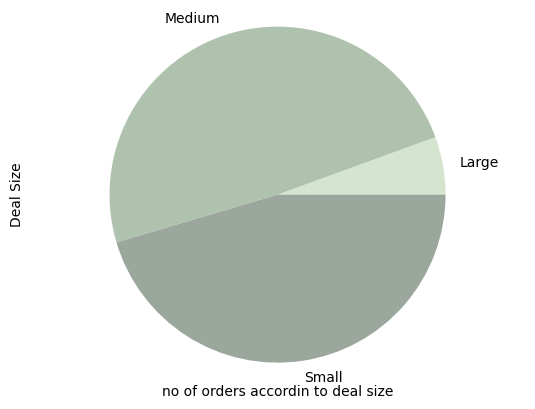

In [429]:
#or analyzing order sizes.
order_Sizes=pd.DataFrame(df.groupby('DEALSIZE')['ORDER NUMBER'].agg('count'))
order_Sizes.reset_index(inplace=True)
plt.pie(order_Sizes['ORDER NUMBER'], labels=order_Sizes['DEALSIZE'],colors=['#D5E4CF','#AFC2AE','#9BA79C'])
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.xlabel('no of orders accordin to deal size')
plt.ylabel('Deal Size')
plt.show()

<Axes: >

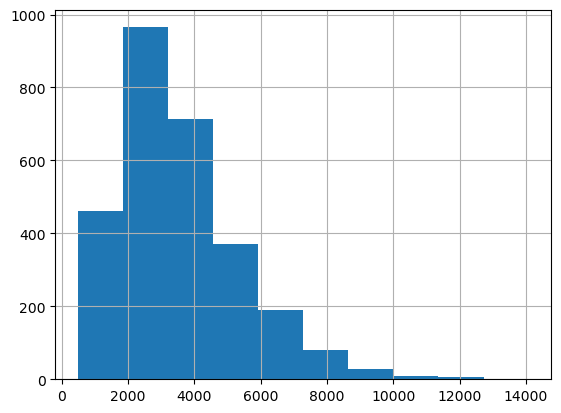

In [435]:
df['SALES'].hist()

<Axes: ylabel='SALES'>

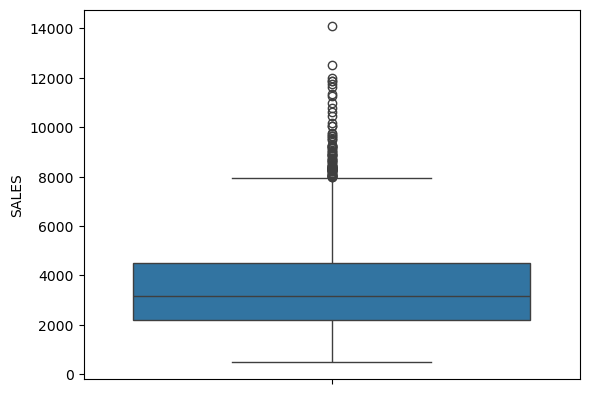

In [451]:
import seaborn as sns
sns.boxplot(df['SALES'])

In [457]:
df[df['SALES']>8000].count()

ORDER NUMBER              79
QUANTITY ORDERED          79
PRICE EACH                79
ORDER LINE NUMBER         79
SALES                     79
ORDER DATE                79
STATUS                    79
QTR_ID                    79
MONTH_ID                  79
YEAR_ID                   79
PRODUCTLINE               79
MSRP                      79
PRODUCTCODE               79
CUSTOMER NAME             79
PHONE                     79
ADDRESSLINE1              79
ADDRESSLINE2               8
CITY                      79
STATE                     38
POSTALCODE                75
COUNTRY                   79
TERRITORY                 79
CONTACTLASTNAME           79
CONTACTFIRSTNAME          79
DEALSIZE                  79
Year                      79
Month_Name                79
MM-Year                   79
Quarter_for_every_year    79
dtype: int64

In [463]:
data_outside_range=df[df['SALES']>8000]
data_outside_range[['QUANTITY ORDERED','PRODUCTLINE','SALES']]

,QUANTITY ORDERED,PRODUCTLINE,SALES
30,45,Classic Cars,10993.50
32,34,Classic Cars,8014.82
35,47,Classic Cars,9064.89
41,34,Classic Cars,8014.82
43,47,Classic Cars,10172.70
...,...,...,...
2241,38,Trucks and Buses,8844.12
2295,48,Trucks and Buses,8209.44
2430,45,Trains,8977.05
2505,46,Planes,10066.60


In [441]:
df.to_csv(r'C:\Users\MM\OneDrive\Desktop\DEPI_Graduation_Project\DataSet_Before_Preparation\sales_data_sample.csv')